### We study the instantaneous velocities of the participants, by obtaining the probability density function (pdf) and fitting it with a Log-Normal distribution. We can take the logarithm of the velocities (scaled with $<v>$ for units) and then we can fit the pdf with a Normal distribution. We also show that rescaling all the individual velocity vectors, all individual pdfs collapse into a single one with zero mean and unit variance (same behaviour).  

### We also study the velocity considering the moving average and the moving average mobile

### Finally, we interpolate the data in order to have all the GPS locations separated by one second (so all temporal gaps are $\Delta t =1s$), and we compare with the original processed data. 

# INDEX

    1. PDF Velocities. Original Data
        1.1. Using v. Fit with Log-Normal distribution
        1.2. Using u. Fit with Normal distribution
        
    2. Individual PDF. Rescaling
    
    3. Moving average
    
    4. Moving average mobile
    

# 1. PDF Velocities. Original Data

In [2]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import glob
import os
from math import sin, cos, sqrt, atan2, radians
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.optimize import curve_fit

#%matplotlib inline
ox.config(log_console=True)
ox.__version__



'1.0.1'

## 1.1. Using v. Fit with Log-Normal distribution

<v>= 1.5219009997850155  std= 0.7523192312888836  e= 0.003964630007391514
min v= 0.0057567082772639  max v= 8.566491492517326
q1 (25%): 1.0693516215124534
q2 (50%): 1.436049109870504
q3 (75%): 1.8501581295809548

----------------------------------------------------------------------

FIT PARAMETERS
mu= 0.4104421299318232 +- 0.004359484257545709
sigma= 0.39117865819759357 +- 0.003745706492889798


<ipython-input-4-9489abe4294e>:39: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-4-9489abe4294e>:40: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


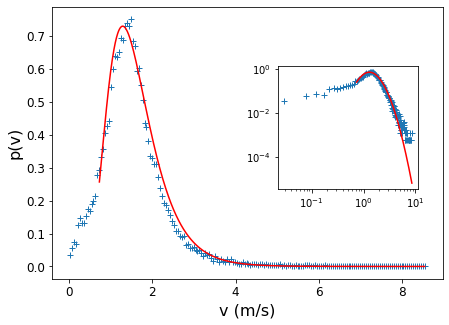

In [4]:
all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)

velocities=[] 
for file in all_files:   # Loop over all csv files in the folder/directory   
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    v=df2['v'][:-1].tolist()   # List of velocities and list of distances (we remove the last element which is NaN)
    velocities.extend(v)      # We put the velocities of all users in a unique list (no moving average)
        

mean = sum(velocities) / len(velocities)
variance = sum([((x - mean) ** 2) for x in velocities]) / len(velocities)
res = variance ** 0.5
error=res/(len(velocities)**0.5)
q1=np.quantile(velocities, 0.25)
q2=np.quantile(velocities, 0.50)
q3=np.quantile(velocities, 0.75)
print('<v>=',mean, '', 'std=',res, '', 'e=',error)
print('min v=',min(velocities),'', 'max v=',max(velocities))
print('q1 (25%):',q1)
print('q2 (50%):',q2)
print('q3 (75%):',q3)

print('')
print('----------------------------------------------------------------------')
print('')

fig, ax = plt.subplots(figsize=(7,5)) 
axins2 = inset_axes(ax, width="80%", height="100%", loc=1,bbox_to_anchor=(0.50,1-0.65,.45,.45), bbox_transform=ax.transAxes)

numpy_matrix = np.array(velocities)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins='auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '+', label='data')    #plot pdf
axins2.plot(bin_centres, counts, '+', label='data')    #plot pdf
ax.set_xlabel('v (m/s)',fontsize=16)
ax.set_ylabel('p(v)',fontsize=16)

axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
ax.tick_params(labelsize=12)


#LOG-NORMAl DISTRIBUTION WITH SCALING PARAMETER "a", mu and sigma
def lognormal(x,sigmag,mu):
    return (1./(sigmag*np.sqrt(2*math.pi)*x))*np.exp(-(np.power((np.log(x)-mu),2)/(2*np.power(sigmag,2))))

#LOG-NORMAL FIT. 
popt, pcov = curve_fit(lognormal, bin_centres[15:], counts[15:], p0=(1,1))
times = np.arange(bin_centres[15], bin_centres[-1], 0.01)
model = lognormal(times, *popt)
perr = np.sqrt(np.diag(pcov))  #calcul error del parametre
ax.plot(times, model, '-r',label='fit')
axins2.plot(times, model, '-r', label='fit')

print('FIT PARAMETERS')
print('mu=', popt[1], '+-', perr[1])
print('sigma=', popt[0], '+-', perr[0])
plt.savefig('pdf.png',dpi=250)
plt.show()   





## 1.2. Using u. Fit with Normal distribution

$ u=\ln \left( \frac{v}{\langle v \rangle} \right)$

<ipython-input-5-2b50963f950e>:29: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-5-2b50963f950e>:30: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


FIT PARAMETERS
mu= -0.01214869489815447 +- 0.006186397766482012
sigma= 0.35850308577005563 +- 0.005120936430384332


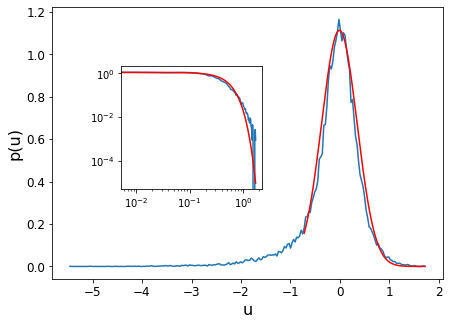

In [5]:
all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)

velocities=[] 
u=[]
for file in all_files:   # Loop over all csv files in the folder/directory   
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    v=df2['v'][:-1].tolist()   # List of velocities and list of distances (we remove the last element which is NaN)
    velocities.extend(v)      # We put the velocities of all users in a unique list (no moving average)
    v_log=[]
    mean_v=sum(v)/len(v)
    for i in range(len(v)):
        v_log.append(np.log(v[i]/mean_v))
        
    u.extend(v_log)
        

fig, ax = plt.subplots(figsize=(7,5)) 
axins2 = inset_axes(ax, width="80%", height="100%", loc=1,bbox_to_anchor=(0.10,1-0.65,.45,.45), bbox_transform=ax.transAxes)

numpy_matrix = np.array(u)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins='auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', label='data')    #plot pdf
axins2.plot(bin_centres, counts, '-', label='data')    #plot pdf
ax.set_xlabel('u',fontsize=16)
ax.set_ylabel('p(u)',fontsize=16)

axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
ax.tick_params(labelsize=12)

def normal(x,sigmag,mu):
    return (1./(sigmag*np.sqrt(2*math.pi)))*np.exp(-(np.power((x-mu),2)/(2*np.power(sigmag,2))))

#NORMAL FIT.
popt, pcov = curve_fit(normal, bin_centres[155:], counts[155:], p0=(1,1))
times = np.arange(bin_centres[155], bin_centres[-1], 0.01)
model = normal(times, *popt)
perr = np.sqrt(np.diag(pcov))  #calcul error del parametre
ax.plot(times, model, '-r',label='fit')
axins2.plot(times, model, '-r', label='fit')

print('FIT PARAMETERS')
print('mu=', popt[1], '+-', perr[1])
print('sigma=', popt[0], '+-', perr[0])

plt.savefig('pdf_log.png',dpi=250)
plt.show() 


# 2- Individual PDF. Rescaling

We rescale the vector of velocities of each individual to have zero mean and unit variance and then represent all the PDFs in order to see if they colapse into a single pdf. This procedure is done to check whether all participants have the same log-Normal behaviour.

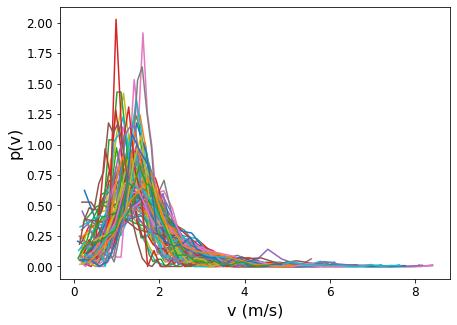

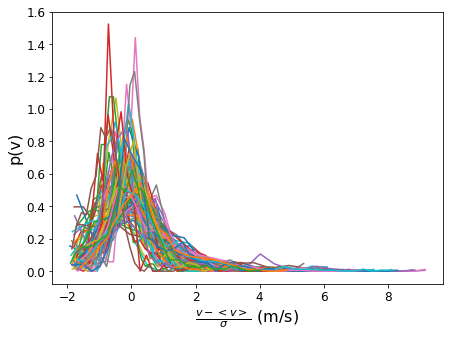

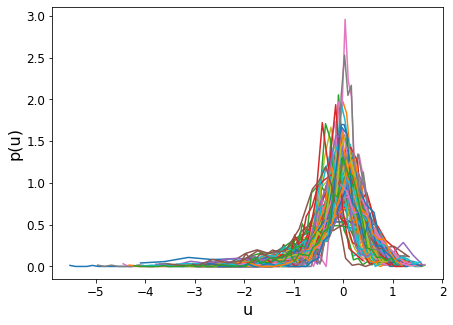

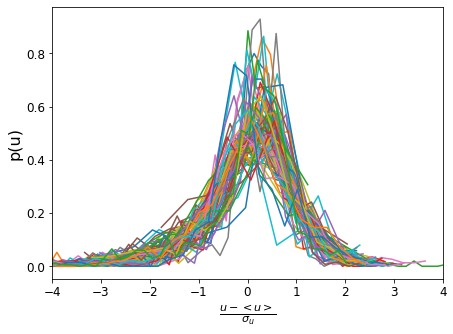

In [10]:
all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)


fig, ax = plt.subplots(figsize=(7,5)) 
fig, ax2 = plt.subplots(figsize=(7,5)) 
fig, ax3 = plt.subplots(figsize=(7,5)) 
fig, ax4 = plt.subplots(figsize=(7,5)) 
#axins2 = inset_axes(ax, width="80%", height="100%", loc=1,bbox_to_anchor=(0.50,1-0.55,.45,.45), bbox_transform=ax.transAxes)

for file in all_files:   # Loop over all csv files in the folder/directory 
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    v=df2['v'][:-1].tolist()   # List of velocities and list of distances (we remove the last element which is NaN)

    v2=[]
    u=[]
    for i in range(len(v)):
        v2.append((v[i]-mean)/res)
        u.append(np.log(v[i]/mean))
        
    u2=[]
    mean_u=sum(u)/len(u)
    variance_u = sum([((x_u- mean_u) ** 2) for x_u in u]) / len(u)
    res_u = variance_u ** 0.5
    for ii in range(len(u)):
        u2.append((u[ii]-mean_u)/res_u)
        
    
    #mean_log= sum(v_log) / len(v_log)
    #variance_log = sum([((x_log - mean_log) ** 2) for x_log in v_log]) / len(v_log)
    #res_log = variance_log ** 0.5
    
    #v_log2=[]
    #for j in range(len(v_log)):
        #v_log2.append((v_log[j]-mean_log)/res_log)
        
    
    numpy_matrix = np.array(v)  #list to array
    counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
    ax.plot(bin_centres, counts, '-', label='no mov. avg.')    #plot pdf
    #axins2.plot(bin_centres, counts, '-', label='no mov. avg.')    #plot pdf
    
    numpy_matrix2 = np.array(v2)  #list to array
    counts2,bin_edges2 = np.histogram(numpy_matrix2,'auto',density=True)   #frequences and bins
    bin_centres2 = (bin_edges2[:-1] + bin_edges2[1:])/2.   #bins center
    ax2.plot(bin_centres2, counts2, '-', label='no mov. avg.')    #plot pdf
    #axins2.plot(bin_centres, counts, '-', label='no mov. avg.')    #plot pdf
    
    numpy_matrix3 = np.array(u)  #list to array
    counts3,bin_edges3 = np.histogram(numpy_matrix3,'auto',density=True)   #frequences and bins
    bin_centres3 = (bin_edges3[:-1] + bin_edges3[1:])/2.   #bins center
    ax3.plot(bin_centres3, counts3, '-', label='no mov. avg.')    #plot pdf
    #axins2.plot(bin_centres, counts, '-', label='no mov. avg.')    #plot pdf
    
    numpy_matrix4 = np.array(u2)  #list to array
    counts4,bin_edges4 = np.histogram(numpy_matrix4,'auto',density=True)   #frequences and bins
    bin_centres4 = (bin_edges4[:-1] + bin_edges4[1:])/2.   #bins center
    ax4.plot(bin_centres4, counts4, '-', label='no mov. avg.')    #plot pdf
    #axins2.plot(bin_centres, counts, '-', label='no mov. avg.')    #plot pdf
    
    
ax.set_xlabel('v (m/s)',fontsize=16)
ax.set_ylabel('p(v)',fontsize=16)
#ax.legend()
#axins2.set_yscale('log',basey=10)
#axins2.set_xscale('log',basex=10)
ax.tick_params(labelsize=12)

ax2.set_xlabel(r'$\frac{v-<v>}{\sigma}$ (m/s)',fontsize=16)
ax2.set_ylabel('p(v)',fontsize=16)
ax2.tick_params(labelsize=12)

ax3.set_xlabel('u',fontsize=16)
ax3.set_ylabel('p(u)',fontsize=16)
ax3.tick_params(labelsize=12)

ax4.set_xlabel(r'$\frac{u-<u>}{\sigma_u}$',fontsize=16)
ax4.set_ylabel('p(u)',fontsize=16)
ax4.tick_params(labelsize=12)
ax4.set_xlim(-4,4)

plt.show()   

# 3. Moving average 

Average every "s" velocities.

For s=2:

$v= \left[ \frac{v_{0}+v_{1}}{2} , \frac{v_{1}+v_{2}}{2}, ...., \frac{v_{N-1}+v_{N}}{2} \right]$

No moving average
<v>= 1.5219009997850155  std= 0.7523192312888836  e= 0.003964630007391514
min v= 0.0057567082772639  max v= 8.566491492517326
36008
q1 (25%): 1.0693516215124534
q2 (50%): 1.436049109870504
q3 (75%): 1.8501581295809548

Moving average every 2 velocities
<v>= 1.522301635547103  std= 0.6782780824846822  e= 0.003578568998935453
min v= 0.02028872191129975  max v= 7.578418600825395
35925
q1 (25%): 1.1109404941813854
q2 (50%): 1.4484177385085228
q3 (75%): 1.8280605956250906

Moving average every 3 velocities
<v>= 1.522537233903945  std= 0.6351592855166418  e= 0.003354953720760563
min v= 0.034774308387809566  max v= 7.258743195860853
35842
q1 (25%): 1.1369491462144654
q2 (50%): 1.4578281145335716
q3 (75%): 1.819492729037584

Moving average every 4 velocities
<v>= 1.5226708129807354  std= 0.603912022934301  e= 0.003193603482469033
min v= 0.05340435210463468  max v= 6.904059347895387
35759
q1 (25%): 1.153466276451936
q2 (50%): 1.4639433702661062
q3 (75%): 1.8128130810344816

Mo

<ipython-input-14-d95168b9aab3>:170: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-14-d95168b9aab3>:171: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


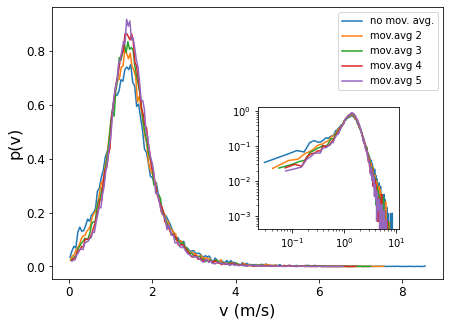

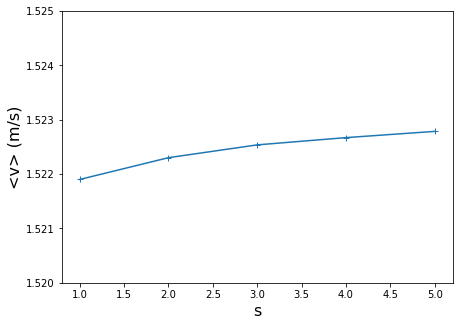

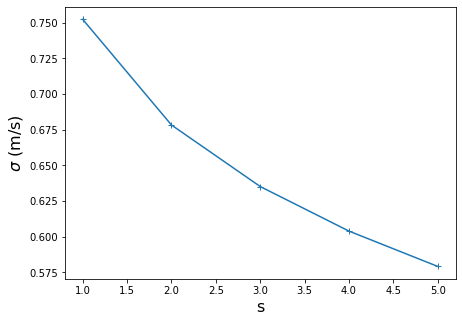

In [14]:
all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)

velocities=[]   # no moving average
v_avg2=[]   # moving average every 2,3,4 and 5 velocities
v_avg3=[]
v_avg4=[]
v_avg5=[]

for file in all_files:   # Loop over all csv files in the folder/directory   
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    v=df2['v'][:-1].tolist()   # List of velocities and list of distances (we remove the last element which is NaN)
    d=df2['d'][:-1].tolist()
    
    velocities.extend(v)      # We put the velocities of all users in a unique list (no moving average)
       
    velocities_avg2=[]
    for i in range(1,len(v)):     #moving average every two consecutive velocities for each user
        velocities_avg2.append((v[i-1]+v[i])/2.0)
    
    velocities_avg3=[]
    for j in range(1,len(v)-1):     #moving average every three consecutive velocities for each user
        velocities_avg3.append((v[j-1]+v[j]+v[j+1])/3.0)
     
    velocities_avg4=[]
    for k in range(1,len(v)-2):     #moving average every four consecutive velocities for each user
        velocities_avg4.append((v[k-1]+v[k]+v[k+1]+v[k+2])/4.0)

    velocities_avg5=[]
    for t in range(1,len(v)-3):     #moving average every five consecutive velocities for each user
        velocities_avg5.append((v[t-1]+v[t]+v[t+1]+v[t+2]+v[t+3])/5.0)
        
    v_avg2.extend(velocities_avg2)   # For each s=2,3,4,5 we put the averaged velocities for all users in a unique list
    v_avg3.extend(velocities_avg3)
    v_avg4.extend(velocities_avg4)
    v_avg5.extend(velocities_avg5)
    


    
# FOR EACH CASE, WE COMPUTE THE MEAN VALUE, THE VARIANCE, THE STANDARD DEVIATION, THE ERROR AND THE QUARTILES, AS WELL AS THE
# SMALLER AND THE GREATER VALUE. THEN WE PRINT THESE VALUES AND WE REPRESENT THE PDF FOR EACH CASE, IN AN UNIQUE FIGURE.

mean = sum(velocities) / len(velocities)
variance = sum([((x - mean) ** 2) for x in velocities]) / len(velocities)
res = variance ** 0.5
error=res/(len(velocities)**0.5)
#velocities.sort()
q1=np.quantile(velocities, 0.25)
q2=np.quantile(velocities, 0.50)
q3=np.quantile(velocities, 0.75)
print('No moving average')
print('<v>=',mean, '', 'std=',res, '', 'e=',error)
print('min v=',min(velocities),'', 'max v=',max(velocities))
print(len(velocities))
print('q1 (25%):',q1)
print('q2 (50%):',q2)
print('q3 (75%):',q3)

print('')
print('Moving average every 2 velocities')
mean2 = sum(v_avg2) / len(v_avg2)
variance2 = sum([((x2 - mean2) ** 2) for x2 in v_avg2]) / len(v_avg2)
res2 = variance2 ** 0.5
error2=res2/(len(v_avg2)**0.5)
#v_avg2.sort()
q1=np.quantile(v_avg2, 0.25)
q2=np.quantile(v_avg2, 0.50)
q3=np.quantile(v_avg2, 0.75)
print('<v>=',mean2, '', 'std=',res2, '', 'e=',error2)
print('min v=',min(v_avg2),'', 'max v=',max(v_avg2))
print(len(v_avg2))
print('q1 (25%):',q1)
print('q2 (50%):',q2)
print('q3 (75%):',q3)

print('')
print('Moving average every 3 velocities')
mean3 = sum(v_avg3) / len(v_avg3)
variance3 = sum([((x3 - mean3) ** 2) for x3 in v_avg3]) / len(v_avg3)
res3 = variance3 ** 0.5
error3=res3/(len(v_avg3)**0.5)
#v_avg3.sort()
q1=np.quantile(v_avg3, 0.25)
q2=np.quantile(v_avg3, 0.50)
q3=np.quantile(v_avg3, 0.75)
print('<v>=',mean3, '', 'std=',res3, '', 'e=',error3)
print('min v=',min(v_avg3),'', 'max v=',max(v_avg3))
print(len(v_avg3))
print('q1 (25%):',q1)
print('q2 (50%):',q2)
print('q3 (75%):',q3)

print('')
print('Moving average every 4 velocities')
mean4 = sum(v_avg4) / len(v_avg4)
variance4 = sum([((x4 - mean4) ** 2) for x4 in v_avg4]) / len(v_avg4)
res4 = variance4 ** 0.5
error4=res4/(len(v_avg4)**0.5)
#v_avg4.sort()
q1=np.quantile(v_avg4, 0.25)
q2=np.quantile(v_avg4, 0.50)
q3=np.quantile(v_avg4, 0.75)
print('<v>=',mean4, '', 'std=',res4, '', 'e=',error4)
print('min v=',min(v_avg4),'', 'max v=',max(v_avg4))
print(len(v_avg4))
print('q1 (25%):',q1)
print('q2 (50%):',q2)
print('q3 (75%):',q3)

print('')
print('Moving average every 5 velocities')
mean5 = sum(v_avg5) / len(v_avg5)
variance5 = sum([((x5 - mean5) ** 2) for x5 in v_avg5]) / len(v_avg5)
res5 = variance5 ** 0.5
error5=res5/(len(v_avg5)**0.5)
#v_avg5.sort()
q1=np.quantile(v_avg5, 0.25)
q2=np.quantile(v_avg5, 0.50)
q3=np.quantile(v_avg5, 0.75)
print('<v>=',mean5, '', 'std=',res5, '', 'e=',error5)
print('min v=',min(v_avg5),'', 'max v=',max(v_avg5))
print(len(v_avg5))
print('q1 (25%):',q1)
print('q2 (50%):',q2)
print('q3 (75%):',q3)


# PDF OF VELOCITIES. FOR EACH MOVING AVERAGE EVERY S=1,2,3,4,5 VELOCITIES.
fig, ax = plt.subplots(figsize=(7,5)) 
axins2 = inset_axes(ax, width="80%", height="100%", loc=1,bbox_to_anchor=(0.45,1-0.80,.45,.45), bbox_transform=ax.transAxes)

numpy_matrix = np.array(velocities)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', label='no mov. avg.')    #plot pdf
axins2.plot(bin_centres, counts, '-', label='no mov. avg.')    #plot pdf

numpy_matrix = np.array(v_avg2)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', label='mov.avg 2')    #plot pdf
axins2.plot(bin_centres, counts, '-', label='mov.avg 2')    #plot pdf

numpy_matrix = np.array(v_avg3)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', label='mov.avg 3')    #plot pdf
axins2.plot(bin_centres, counts, '-', label='mov.avg 3')    #plot pdf

numpy_matrix = np.array(v_avg4)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', label='mov.avg 4')    #plot pdf
axins2.plot(bin_centres, counts, '-', label='mov.avg 4')    #plot pdf

numpy_matrix = np.array(v_avg5)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', label='mov.avg 5')    #plot pdf
axins2.plot(bin_centres, counts, '-', label='mov.avg 5')    #plot pdf

#ax.set_yscale('log')
#ax.set_xscale('log')

ax.set_xlabel('v (m/s)',fontsize=16)
ax.set_ylabel('p(v)',fontsize=16)
ax.legend()

axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
ax.tick_params(labelsize=12)

plt.show()   


v_averages=[mean,mean2,mean3,mean4,mean5]
std_averages=[res,res2,res3,res4,res5]
s=[1,2,3,4,5]

fig, ax = plt.subplots(figsize=(7,5)) 

ax.plot(s,v_averages,'+-')
ax.set_xlabel('s',fontsize=16)
ax.set_ylabel('<v> (m/s)',fontsize=16)
ax.set_ylim(1.52,1.525)

plt.show()

fig, ax = plt.subplots(figsize=(7,5)) 

ax.plot(s,std_averages,'+-')
ax.set_xlabel('s',fontsize=16)
ax.set_ylabel(r'$\sigma$ (m/s)',fontsize=16)

plt.show()


# 4- MOVING AVERAGE MOBILE

We repeat the above procedure but now computing the distances and velocities between GPS locations separated every s=1,2,3,4... points.

In other words, if s=1, we simply obtain the distances and velocities of consecutive points.

If s=2, we calculate the At, distance and velocity between the points in the locations 2 and 0, then between 3 and 1, then between 4 and 2... and so. That is:

$\Delta t = \left[ t_{2}-t_{0},  t_{3}-t_{1},..., t_{N}-t_{N-2} \right]$

$d = \left[ d_{2,0}, d_{3,1},..., d_{N,N-2} \right]$

$v= \left[ \frac{d_{2,0}}{t_{2}-t_{0}},  \frac{d_{3,1}}{t_{3}-t_{1}},..., \frac{d_{N,N-2}}{t_{N}-t_{N-2}} \right]$

If s=3, At, d and v between the points at locations 3 and 0, 4 and 1, 5 and 2... and so.



s= 1
nº GPS locs. 36008
<v>= 1.5219009997850186   std= 0.7523192312888785 error= 0.003964630007391487
v min= 0.005756708277263974   v max= 8.566491492517326
Q1 (25%): 1.0693516215124534 m/s
Q2 (50%): 1.4360491098720187 m/s
Q3 (75%): 1.8501581295809548 m/s


s= 2
nº GPS locs. 35925
<v>= 1.476766647105455   std= 0.6777267565873943 error= 0.0035756602247684955
v min= 0.0032970826826994116   v max= 7.577430947017444
Q1 (25%): 1.069626552386285 m/s
Q2 (50%): 1.4172286635501388 m/s
Q3 (75%): 1.7882094946621077 m/s


s= 3
nº GPS locs. 35842
<v>= 1.4508859977436035   std= 0.6349375599568557 error= 0.0033537825515613487
v min= 0.011524343494786834   v max= 7.256422229713234
Q1 (25%): 1.07445778282209 m/s
Q2 (50%): 1.408550903858509 m/s
Q3 (75%): 1.7579493062679439 m/s


s= 4
nº GPS locs. 35759
<v>= 1.431711250001648   std= 0.6032986940573266 error= 0.0031903600808426058
v min= 0.003690054631043472   v max= 6.714184410078783
Q1 (25%): 1.07468229750396 m/s
Q2 (50%): 1.3992633306734257 m/s
Q3 (75%

<ipython-input-24-136239f02a89>:120: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-24-136239f02a89>:121: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)
<ipython-input-24-136239f02a89>:124: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins3.set_yscale('log',basey=10)
<ipython-input-24-136239f02a89>:125: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins3.set_xscale('log',ba

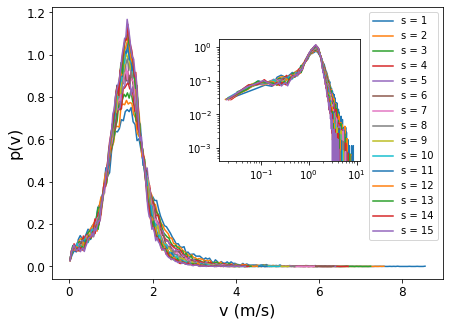

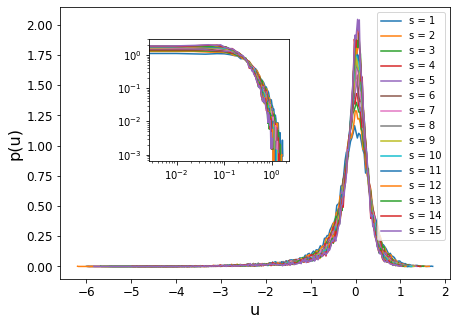

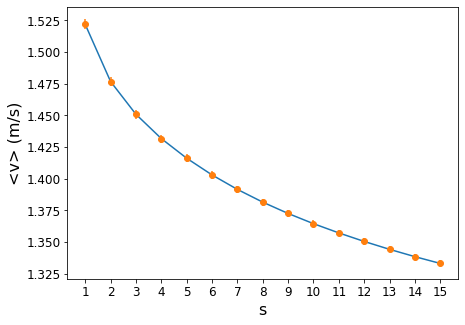

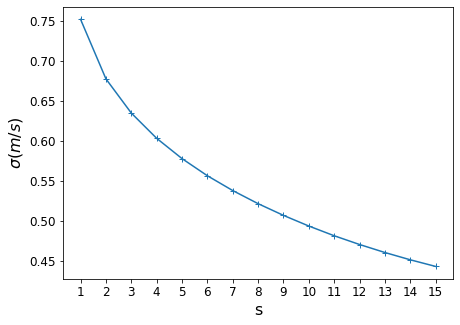

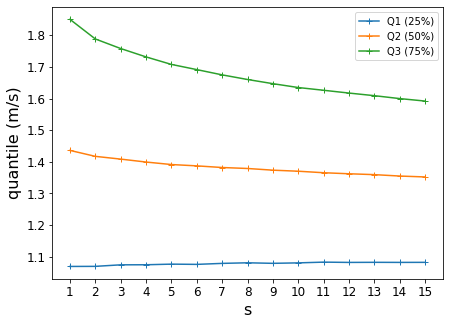

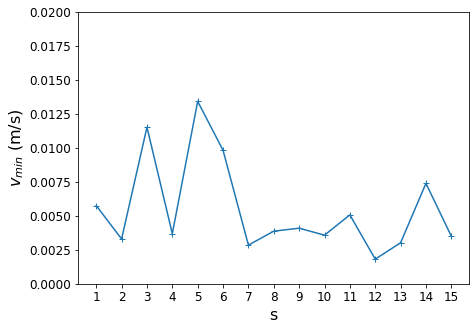

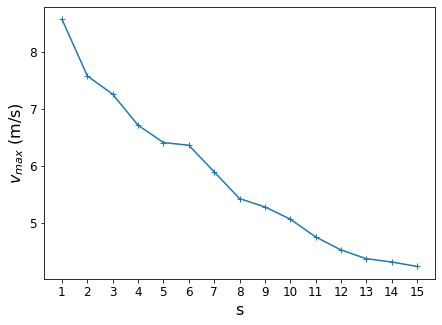

In [24]:
def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    e= d*1000 #distance in m
    return e



all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)

fig, ax = plt.subplots(figsize=(7,5)) 
axins2 = inset_axes(ax, width="80%", height="100%", loc=1,bbox_to_anchor=(0.35,1-0.55,.45,.45), bbox_transform=ax.transAxes)

fig, ax2 = plt.subplots(figsize=(7,5)) 
axins3 = inset_axes(ax2, width="80%", height="100%", loc=1,bbox_to_anchor=(0.15,1-0.55,.45,.45), bbox_transform=ax.transAxes)

llista=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
average_v_s=[]
std_v_s=[]
stds=[]
quantile1=[]
quantile2=[]
quantile3=[]
v_min=[]
v_max=[]
for s in llista:
    v=[]
    u=[]
    for file in all_files:   # Loop over all csv files in the folder/directory   
        df = pd.read_csv(file)  # Read the csv file of each user
        df2=df.copy() 

        if 'index' in df2:   # if the file has the column index, delete it
            del df2['index']

        df2['time'] = pd.to_datetime(df2['time'])   # Time to datetime format

    
        # We calculate the time difference and the distance every "s" points (timesteps). So if s=1 we obtain the At/dist/vel. every
        # timestep (i.e. consecutive). If s=2, we calculate the differece between points separated 2 steps (t2-t0, t3-t1,...) and so
        At=[]
        distance=[]
        for i in range(1,len(df2['time'])-s):
            At.append((df2['time'][i+s]-df2['time'][i-1]).total_seconds())
            dist=getDistanceFromLatLonInM(df2['latitude'][i-1],df2['longitude'][i-1],df2['latitude'][i+s],df2['longitude'][i+s])
            distance.append(dist)
            
        for ii in range(s+1):   # We must insert as many NaN values in the end as we increase s (to insert into the dataframe)
            At.insert(len(At), np.nan)
            distance.insert(len(distance), np.nan)
    

        df2['At']=At                # Insert the columns into the dataframe, calculate v (same as d if At=1s.)
        df2['d']=distance           # Then get a list of non NaN velocities, and obtain the mean value and the pdf for each s
        df2['v']=df2['d']/df2['At']

        vel=df2['v'][~df2['v'].isnull()].tolist()
        
        mean_v=sum(vel)/len(vel)
        uu=[]
        for i in range(len(vel)):
            uu.append(np.log(vel[i]/mean_v))
        
        v.extend(vel)
        u.extend(uu)
        
    mean = sum(v) / len(v)
    variance = sum([((x - mean) ** 2) for x in v]) / len(v)
    res = variance ** 0.5
    error=res/(len(v)**0.5)
   
    print('s=',s+1)
    print('nº GPS locs.',len(v))
    print('<v>=', mean, '','', 'std=',res, 'error=',error)
    print('v min=', min(v), '','', 'v max=',max(v))
    q1=np.quantile(v, 0.25)
    q2=np.quantile(v, 0.50)
    q3=np.quantile(v, 0.75)
    print('Q1 (25%):',q1, 'm/s')
    print('Q2 (50%):',q2, 'm/s')
    print('Q3 (75%):',q3, 'm/s')
    print('')
    print('')
    
    quantile1.append(q1)
    quantile2.append(q2)
    quantile3.append(q3)
    
    v_min.append(min(v))
    v_max.append(max(v))

    numpy_matrix = np.array(v)  #list to array
    counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
    ax.plot(bin_centres, counts, '-', label=f's = {s+1}')    #plot pdf
    axins2.plot(bin_centres, counts, '-', label=f's = {s+1}')    #plot pdf
    
    numpy_matrix2 = np.array(u)  #list to array
    counts2,bin_edges2 = np.histogram(numpy_matrix2,'auto',density=True)   #frequences and bins
    bin_centres2 = (bin_edges2[:-1] + bin_edges2[1:])/2.   #bins center
    ax2.plot(bin_centres2, counts2, '-', label=f's = {s+1}')    #plot pdf
    axins3.plot(bin_centres2, counts2, '-', label=f's = {s+1}')    #plot pdf
      
      
    average_v_s.append(mean) # Save the <v> for each s (average over all users and all points)
    std_v_s.append(error)
    stds.append(res)


ax.set_xlabel('v (m/s)',fontsize=16)
ax.set_ylabel('p(v)',fontsize=16)
ax2.set_xlabel('u',fontsize=16)
ax2.set_ylabel('p(u)',fontsize=16)
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
ax.tick_params(labelsize=12)
ax.legend(loc='upper right')
axins3.set_yscale('log',basey=10)
axins3.set_xscale('log',basex=10)
ax2.tick_params(labelsize=12)
ax2.legend(loc='upper right')
plt.show()


s=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
fig, ax = plt.subplots(figsize=(7,5)) 
ax.plot(s,average_v_s, '+-',label='v')
ax.errorbar(s,average_v_s, yerr=std_v_s, fmt='o')
ax.set_xlabel('s', fontsize=16)
ax.set_ylabel('<v> (m/s)', fontsize=16)
ax.tick_params(labelsize=12)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])


plt.show()

fig, ax = plt.subplots(figsize=(7,5)) 
ax.plot(s,stds, '+-',label='v')
ax.set_xlabel('s', fontsize=16)
ax.set_ylabel(r'$\sigma (m/s)$', fontsize=16)
ax.tick_params(labelsize=12)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.show()


fig, ax = plt.subplots(figsize=(7,5)) 
ax.plot(s,quantile1, '+-',label='Q1 (25%)')
ax.plot(s,quantile2, '+-',label='Q2 (50%)')
ax.plot(s,quantile3, '+-',label='Q3 (75%)')
ax.set_xlabel('s', fontsize=16)
ax.set_ylabel('quantile (m/s)', fontsize=16)
ax.tick_params(labelsize=12)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.legend()
plt.show()


fig, ax = plt.subplots(figsize=(7,5)) 
ax.plot(s,v_min, '+-',label='Q1 (25%)')
ax.set_xlabel('s', fontsize=16)
ax.set_ylabel(r'$v_{min}$ (m/s)', fontsize=16)
ax.tick_params(labelsize=12)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
#ax.legend()
ax.set_ylim(0,0.02)
plt.show()



fig, ax = plt.subplots(figsize=(7,5)) 
ax.plot(s,v_max, '+-',label='Q1 (25%)')
ax.set_xlabel('s', fontsize=16)
ax.set_ylabel(r'$v_{max}$ (m/s)', fontsize=16)
ax.tick_params(labelsize=12)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
#ax.legend()
plt.show()





